feature descriptor

In [2]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<Axes: >, <matplotlib.image.AxesImage at 0x20667d23190>)

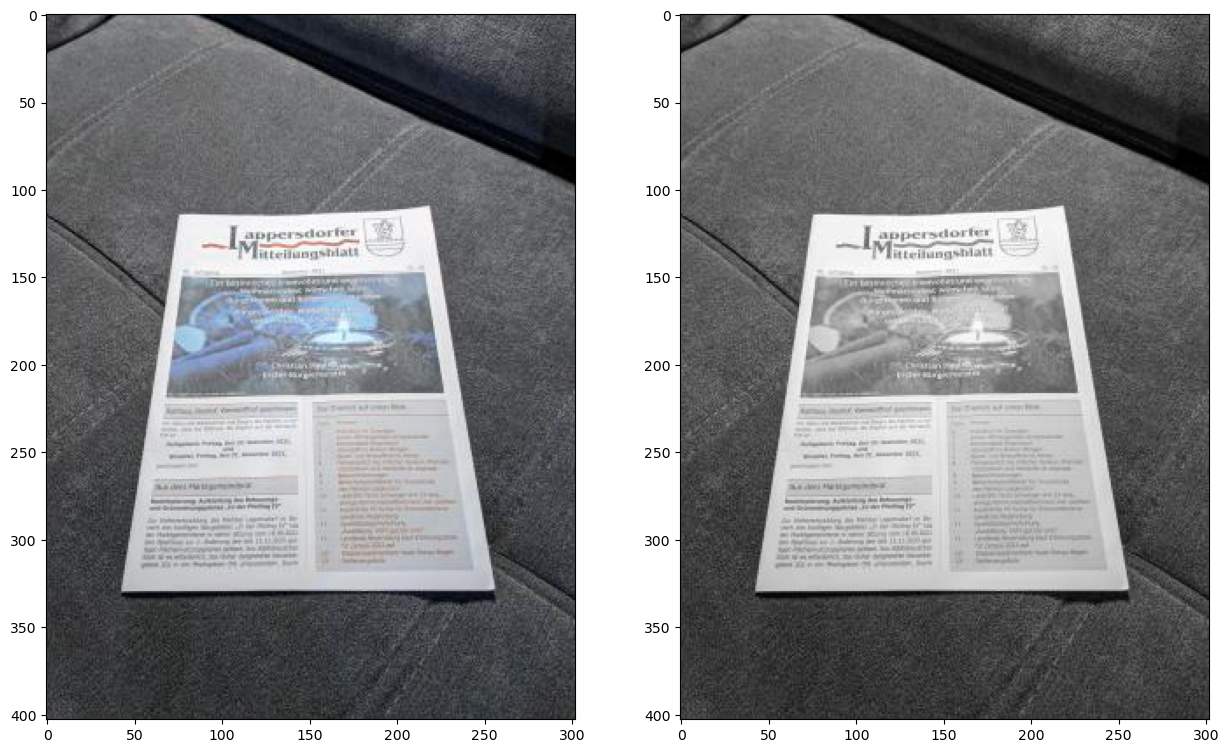

In [3]:
# Let's read the image
img = cv2.imread('document.jpg')
# Convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the images (colour and gray scale)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x20666ccdc10>)

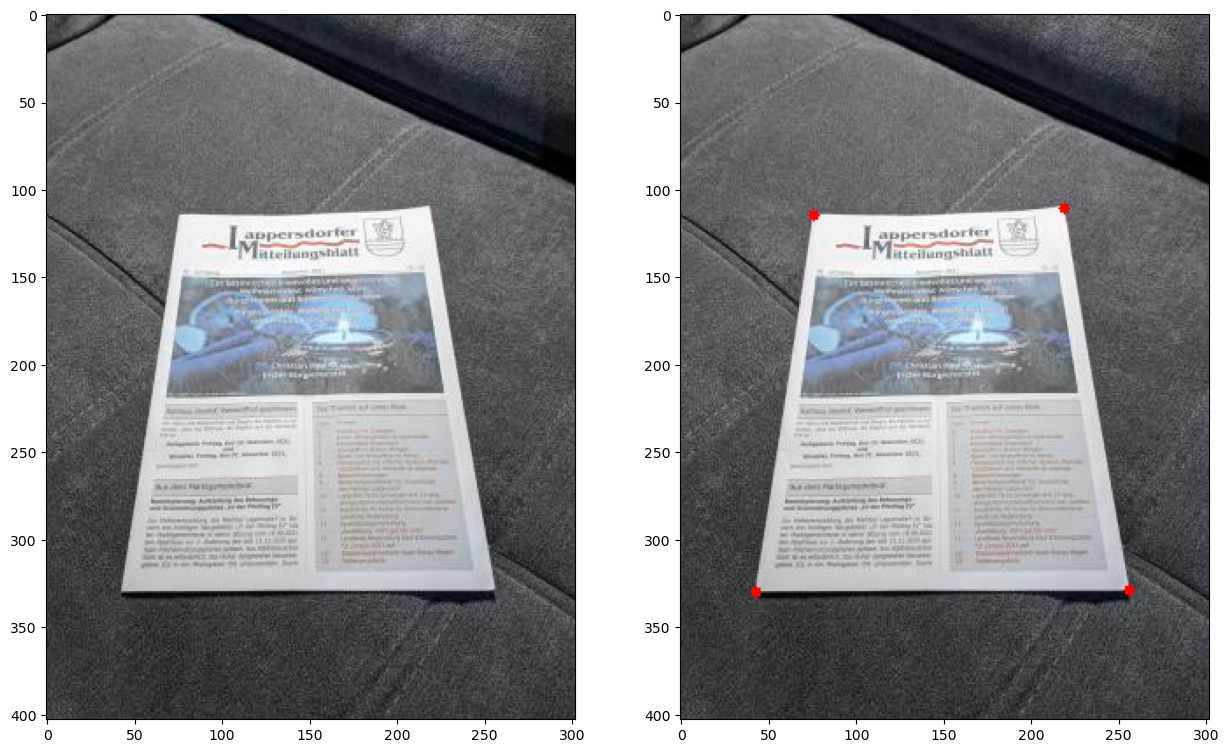

In [4]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

# Let's plot the points
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

In [16]:
# Define the matrix of source points corresponding to the 4 document corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

# Define the matrix of target (destination) points corresponding to the 4 image corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
# Note2: The order of points in src and dst must be the same
dst = np.array([[0, 0], [300, 0], [0, 400], [300, 400]], dtype=np.float32) 


(<Axes: >, <matplotlib.image.AxesImage at 0x2066970ea10>)

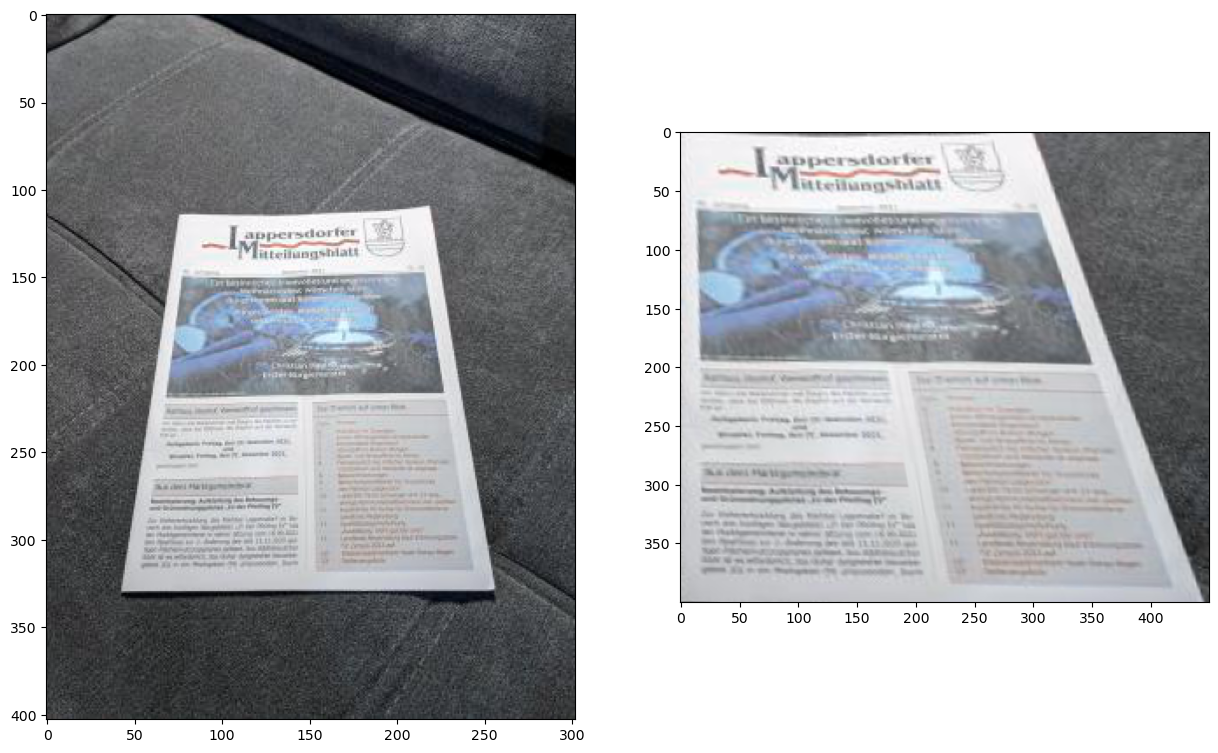

In [18]:
# Compute the affine transform matrix (you'll have to use getAffineTransform function from OpenCV here)
# Use the first 3 points from your src and dst matrix
src_3f = np.array([top_left, top_right, bottom_left], dtype=np.float32)
dst_3f = np.array([[0, 0], [300, 0], [0, 400]], dtype=np.float32) 

M = cv2.getAffineTransform(src_3f, dst_3f)

# Build the rectified image using the computed matrix (you'll have to use warpAffine function from OpenCV here)
rectified = cv2.warpAffine(img, M, (450, 400))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<Axes: >, <matplotlib.image.AxesImage at 0x2066914ccd0>)

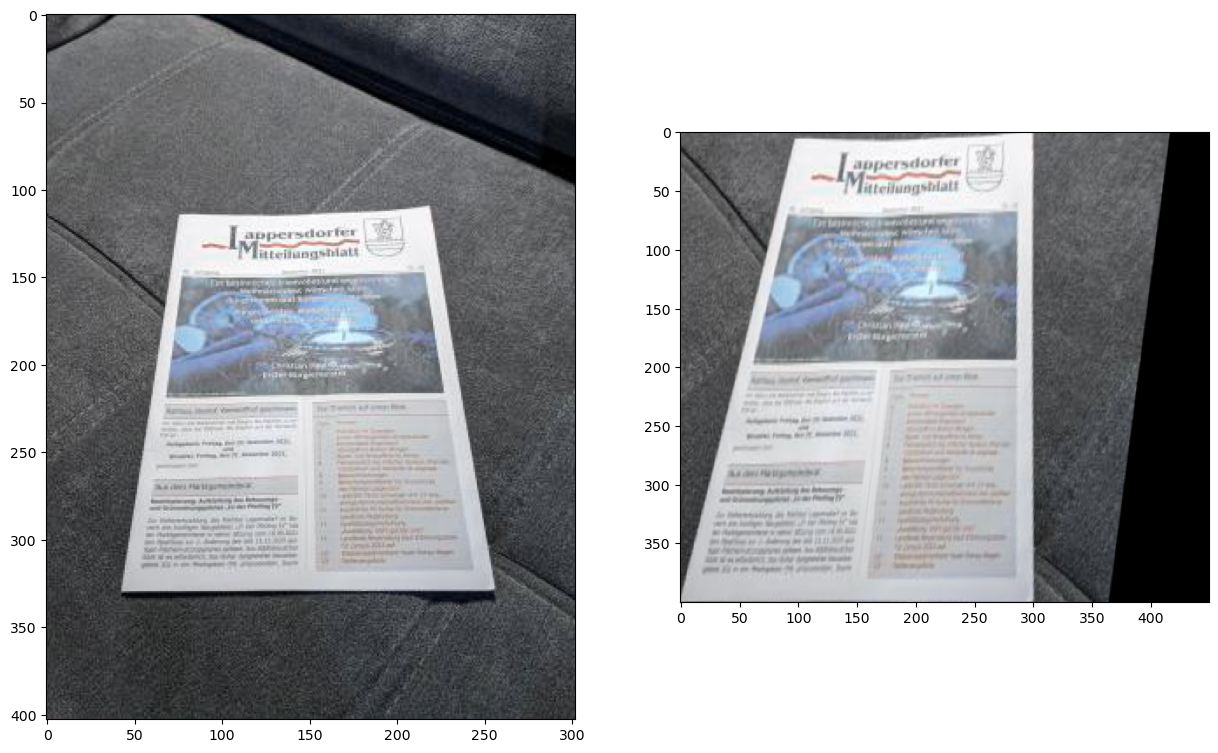

In [19]:
# Compute the affine transform matrix (you'll have to use getAffineTransform function from OpenCV here)
# Use the last 3 points from your src and dst matrix
src_3l = np.array([top_right, bottom_left, bottom_right], dtype=np.float32)
dst_3l = np.array([[300, 0], [0, 400], [300, 400]], dtype=np.float32) 

M = cv2.getAffineTransform(src_3l, dst_3l)

# Build the rectified image using the computed matrix (you'll have to use warpAffine function from OpenCV here)
rectified = cv2.warpAffine(img, M, (450, 400))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

M:  [[ 2.08798927e+00 -3.54383500e-01 -1.17933082e+02]
 [ 5.10823064e-02  1.82619245e+00 -2.13894387e+02]]
Inliers:  [[1]
 [1]
 [0]
 [1]]


(<Axes: >, <matplotlib.image.AxesImage at 0x2066be12050>)

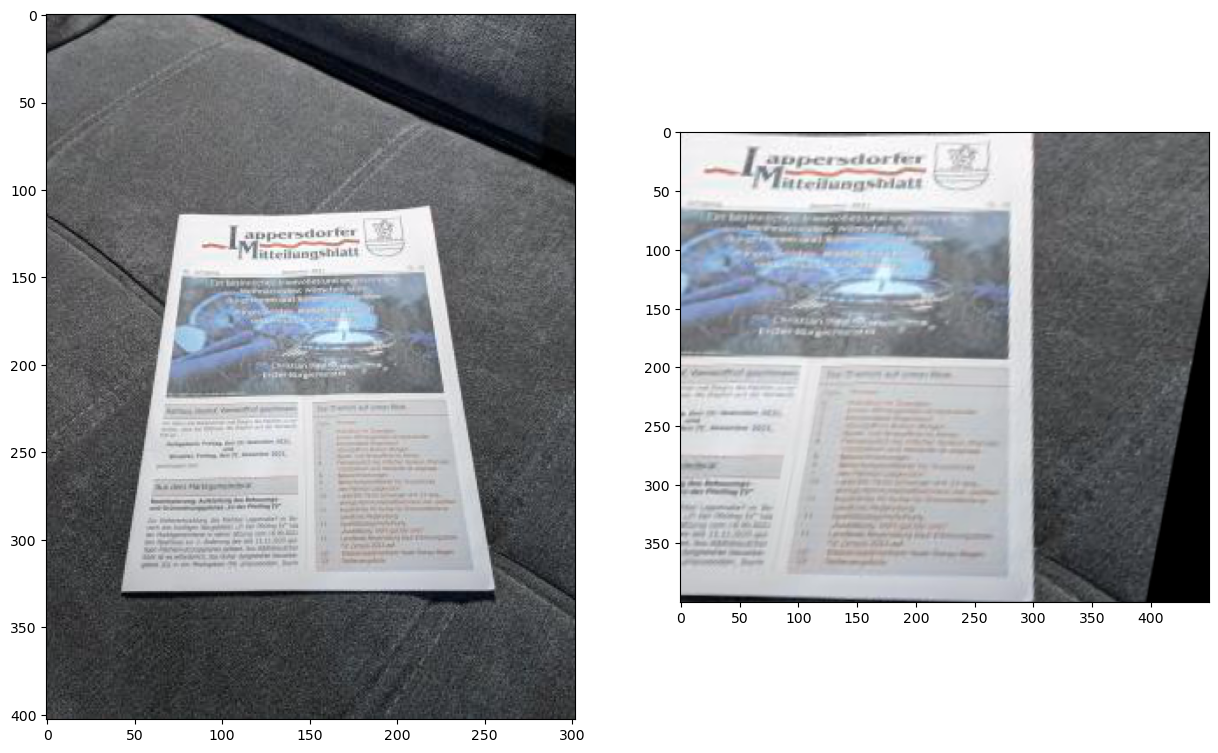

In [26]:
# Estimate the optimal affine transform matrix (you'll have to use estimateAffine2D function from OpenCV here)
# estimateAffine2D it returns the best fitting affine matrix as well as the vector of inliers (1 -> inlier,
# 0 -> outlier).
src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)
dst = np.array([[0, 0], [300, 0], [0, 400], [300, 400]], dtype=np.float32) 

M, inliers = cv2.estimateAffine2D(src, dst)
print("M: ", M)
print("Inliers: ", inliers)
# Build the rectified image using the computed matrix (use warpAffine)
rectified = cv2.warpAffine(img, M, (450, 400))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

(<Axes: >, <matplotlib.image.AxesImage at 0x2066d9dbc90>)

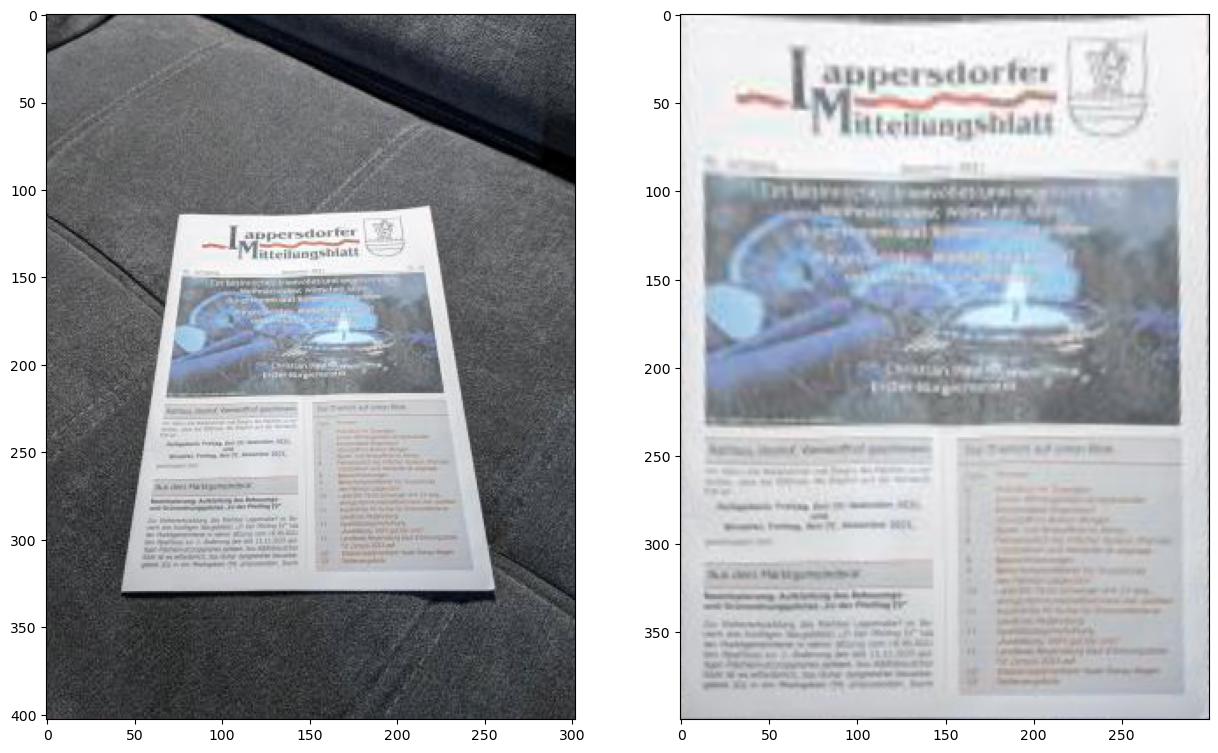

In [25]:
# Compute the homography matrix (you'll have to use getPerspectiveTransform function from OpenCV here)

src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)
dst = np.array([[0, 0], [300, 0], [0, 400], [300, 400]], dtype=np.float32)

M = cv2.getPerspectiveTransform(src, dst)

# Build the rectified image using the computed matrix (you'll have to use warpPerspective function from OpenCV)
rectified = cv2.warpPerspective(img, M, (300, 400))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)

The affine transform does not seem to be working well in this case. Why? - it handles badly perspective because it keeps prallelism
What can you tell me about the values you have obtained for the inliers vector? What does it mean? - it marks the third point as an oulier ([0]), means it cant map it, might be because of perspective destortion
How does the result from homography look? Does it work well enough? - Homography result looks much better becasue it handles distortion.